In [78]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns

In [79]:
data=pd.read_csv(r'C:\Users\SAKSHI\Documents\python\adultdata.csv')
c=['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']
data.columns=c
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [80]:
for x in data:
    null_values=data[x].isin([" ?"]).sum()
    if null_values!=0:
        print(x,'=',null_values)
data.shape

workclass = 1836
occupation = 1843
native.country = 583


(32560, 15)

In [81]:
data=data[data['workclass']!=' ?']
data=data[data['occupation']!=' ?']
data=data[data['native.country']!=' ?']
data.shape

(30161, 15)

In [82]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30161.000000,3.016100e+04,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,1.897976e+05,10.121216,1091.971984,88.375419,40.931269
std,13.134882,1.056527e+05,2.549983,7406.466659,404.304753,11.980182
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176280e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784290e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376300e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [83]:
data.income.value_counts()

 <=50K    22653
 >50K      7508
Name: income, dtype: int64

<=50K: 0.7510692616292564
>50K: 0.24893073837074367


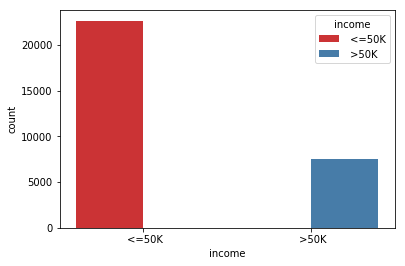

In [84]:
#check if the two classes are balanced
print('<=50K:',data["income"].value_counts()[0] / data.shape[0])
print('>50K:',data["income"].value_counts()[1] / data.shape[0])
sns.countplot(x='income',data=data, hue="income",palette="Set1")

In [85]:
data.replace([' Divorced', ' Married-AF-spouse', 
              ' Married-civ-spouse', ' Married-spouse-absent', 
              ' Never-married',' Separated',' Widowed'],
             ['not married','married','married','married',
              'not married','not married','not married'], inplace = True)

In [86]:
import numpy as np
for col in data:
    b, c = np.unique(data[col], return_inverse=True) 
    data[col] = c

data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,33,4,2726,9,12,0,3,0,4,1,0,0,12,38,0
1,21,2,13187,11,8,1,5,1,4,1,0,0,39,38,0
2,36,2,14353,1,6,0,5,0,2,1,0,0,39,38,0
3,11,2,18119,9,12,0,9,5,2,0,0,0,39,4,0
4,20,2,16566,12,13,0,3,5,4,0,0,0,39,38,0


In [87]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
array = data.values
X = array[:,0:14]
Y = array[:,14]
rfe = RFE(model)
fit = rfe.fit(X, Y)
i=0
feature=list()
print('Num Features:',fit.n_features_)
for x,y in zip(fit.support_,data):
    if x:
        feature.append(y)
print("Feature Ranking:",fit.ranking_)
print("Selected Features:",feature)

Num Features: 7
Feature Ranking: [1 1 8 5 1 1 7 1 1 1 4 3 2 6]
Selected Features: ['age', 'workclass', 'education.num', 'marital.status', 'relationship', 'race', 'sex']


In [88]:
drop_elements = ['fnlwgt','education', 'native.country','occupation','income', 
                'capital.gain','capital.loss','hours.per.week','native.country']
y = data["income"]
X = data.drop(drop_elements, axis=1)
X.head()

,age,workclass,education.num,marital.status,relationship,race,sex
0,33,4,12,0,0,4,1
1,21,2,8,1,1,4,1
2,36,2,6,0,0,2,1
3,11,2,12,0,5,2,0
4,20,2,13,0,5,4,0


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
y_pred = logreg.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[4195  322]
 [ 782  734]]


In [91]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.84      0.93      0.88      4517
          1       0.70      0.48      0.57      1516

avg / total       0.81      0.82      0.81      6033



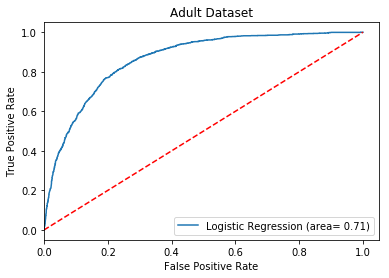

In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc=roc_auc_score(y_test,logreg.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area= %0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Adult Dataset')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [93]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.8170064644455495
